In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Problem Statement:

In [4]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,500,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,102,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### EDA + Feature Engg.

In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isna().mean()*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

<AxesSubplot:>

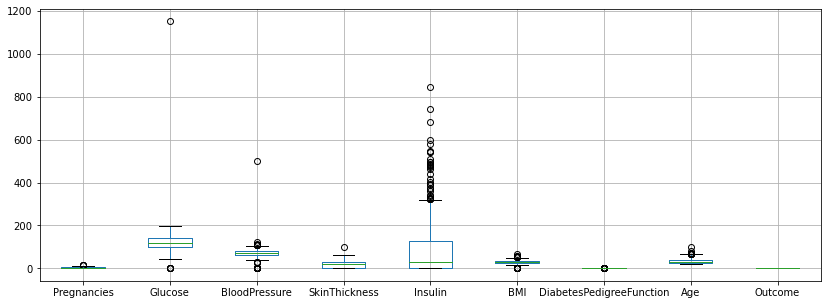

In [8]:
plt.figure(figsize=(14,5))
df.boxplot()

## 1.Pregnancies

In [9]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [10]:
a = df["Pregnancies"].unique()

<AxesSubplot:>

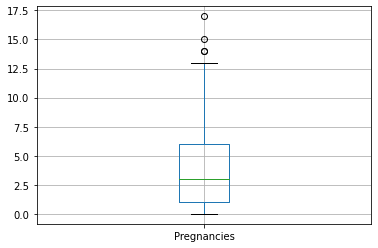

In [11]:
df[["Pregnancies"]].boxplot()

<AxesSubplot:xlabel='Pregnancies'>

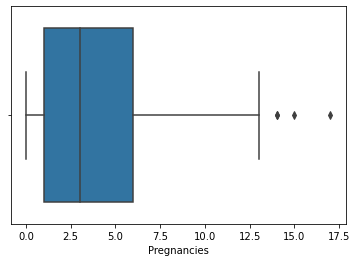

In [12]:
sns.boxplot(df["Pregnancies"])

In [13]:
df["Pregnancies"].loc[df["Pregnancies"]>12.5]

28     13
72     13
86     13
88     15
159    17
274    13
298    14
323    13
357    13
455    14
518    13
635    13
691    13
744    13
Name: Pregnancies, dtype: int64

In [14]:
df["Pregnancies"].loc[df["Pregnancies"]<12.5].mean()

3.6644562334217508

In [15]:
df["Pregnancies"].loc[df["Pregnancies"]<12.5].median()    # check how to fill outlier

3.0

### 2.Glucose

In [16]:
df["Glucose"].nunique()

137

### 3.BloodPressure

In [17]:
df["BloodPressure"].nunique()

48

### 4.SkinThickness 

In [18]:
df["SkinThickness"].nunique()

51

### 5.Insulin

In [19]:
df["Insulin"].nunique()

186

### 6.BMI

In [20]:
df["BMI"].nunique()

248

### 7.DiabetesPedigreeFunction

In [21]:
df["DiabetesPedigreeFunction"].nunique()

517

### 8.Age

In [22]:
df["Age"].nunique()

53

### 9.Outcome 

In [23]:
df["Outcome"].nunique()

2

### Feature_Selection

### Model training

In [24]:
# X,Y data seperation
x = df.drop("Outcome",axis=1)
y = df["Outcome"]
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12,stratify=y)

In [25]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

### Model Evaluation

In [26]:
# test data evaluation
y_test_predict = log_model.predict(x_test)
acc = accuracy_score(y_test_predict,y_test)
print("acc",acc)
cnf_matrix = confusion_matrix(y_test_predict,y_test)
print("cnf_matrix :\n",cnf_matrix)
cls_report = classification_report(y_test_predict,y_test)
print("cls_report :\n",cls_report)

acc 0.7467532467532467
cnf_matrix :
 [[87 26]
 [13 28]]
cls_report :
               precision    recall  f1-score   support

           0       0.87      0.77      0.82       113
           1       0.52      0.68      0.59        41

    accuracy                           0.75       154
   macro avg       0.69      0.73      0.70       154
weighted avg       0.78      0.75      0.76       154



In [27]:
# training data evaluation
y_train_predict = log_model.predict(x_train)
acc = accuracy_score(y_train_predict,y_train)
print("acc",acc)
cnf_matrix = confusion_matrix(y_train_predict,y_train)
print("cnf_matrix :\n",cnf_matrix)
cls_report = classification_report(y_train_predict,y_train)
print("cls_report :\n",cls_report)

acc 0.7638436482084691
cnf_matrix :
 [[357 102]
 [ 43 112]]
cls_report :
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       459
           1       0.52      0.72      0.61       155

    accuracy                           0.76       614
   macro avg       0.71      0.75      0.72       614
weighted avg       0.80      0.76      0.77       614



In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Model Dump

In [29]:
import pickle
pickle.dump(log_model,open("model.pkl","wb"))

In [30]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [31]:
## 
# Pregnancies = int(input())
# Glucose = int(input())
# BloodPressure = int(input())
# SkinThickness = int(input())
# Insulin = int(input())
# BMI = float(input())
# DiabetesPedigreeFunction = float(input())
# Age = int(input())

# result = log_model.predict([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])

# result[0]